<h3>Импорт всех необходимых библиотек</h3>

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn.datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error


<h3>Загрузка датасета</h3>

In [123]:
diabetes = load_diabetes()

<h3>Исследование данных</h3>

In [124]:
print("Ключи diabetes(): \n{}".format(diabetes.keys()))
print("Форма массива data для набора diabetes: {}".format(diabetes.data.shape))
print("Количество пример для каждого класса:\n{}".format({n: v for n, v in zip(diabetes.target_filename, np.bincount (diabetes.target.astype(int)))}))
print("Имена признаков:\n{}".format(diabetes.feature_names))

Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Форма массива data для набора diabetes: (442, 10)
Количество пример для каждого класса:
{'d': 0, 'i': 0, 'a': 0, 'b': 0, 'e': 0, 't': 0, 's': 0, '_': 0, 'r': 0, 'g': 0, '.': 0, 'c': 0, 'v': 0, 'z': 0}
Имена признаков:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h3>Разделение данных на тренировочную и тестовую выборки</h3>

In [125]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

<h3>Модель KNeighborsRegressor</h3>

In [126]:
test_scores = []
train_scores = []
for i in range(1,300):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
## оценка, полученная в результате тестирования на тех же точках данных, которые использовались для обучения
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))
## оценка, полученная в результате тестирования на тех точках данных, которые изначально были разделены для использования исключительно для тестирования
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 47.124093770150424 % and k = [32]


In [127]:
# Устанавливаем 6 соседей так как здесь значение максимально
knn = KNeighborsRegressor(32)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора (для 32 соседей): \n{}".format(y_pred))
print("\n(R^2) Правильность на текстовом наборе: {:.2f} %\n".format(knn.score(X_test, y_test)))

Прогнозы для тестового набора (для 32 соседей): 
[160.1875  148.      162.96875 231.65625 151.5625  134.21875 230.75
 184.8125   96.15625 129.25    118.875   140.59375 100.4375  195.9375
 108.375   109.75    214.1875  225.53125 144.84375 208.71875 177.53125
 109.28125  87.25    178.1875  133.5     147.71875 187.15625 170.09375
  88.34375 131.625   170.78125 132.3125  138.46875 178.84375 171.
 177.21875 127.21875 150.96875 168.28125  88.5     103.25    120.5
 141.09375 173.25    164.      102.25    113.5     117.1875   86.34375
 141.5625  126.90625 104.34375 141.125   111.9375  182.75    149.1875
 115.8125  185.8125  110.21875 102.8125  174.71875 173.03125  96.6875
 116.84375 130.25    177.46875 175.46875 156.65625 107.625   133.5
 157.      194.96875 213.6875  114.5625   97.96875 175.5625  199.34375
 170.03125 162.4375  182.875   124.0625  120.84375  96.5     104.46875
 110.375    96.90625  96.3125   98.8125  137.65625 201.34375 156.21875
 200.0625  104.6875   92.75    102.15625 187.09

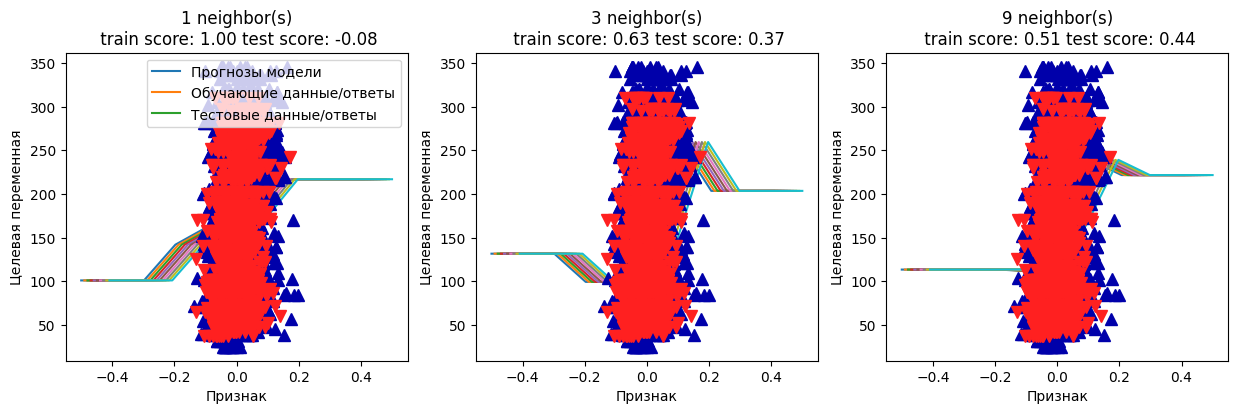

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-0.5, 0.5, 100).reshape(-1, 10)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")


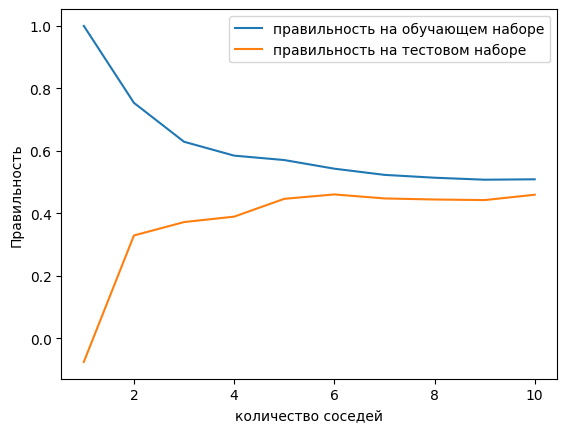

In [129]:
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsRegressor(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()


<h3>Модель LinearRegression</h3>

In [130]:
lin_reg = LinearRegression()
lr = lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


lr.coef_: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept_: 151.6651755919933
Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48


<h3>Модель Ridge</h3 >

In [131]:
ridge1 = Ridge(alpha=1.0).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_reg_predictions1 = ridge1.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions1)

ridge_reg_predictions10 = ridge10.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions10)

ridge_reg_predictions01 = ridge01.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions01)
print("Правильность на обучающем наборе (alpha = 1): {:.2f}".format(ridge1.score(X_train, y_train)))
print("Правильность на тестовом наборе (alpha = 1): {:.2f}\n".format(ridge1.score(X_test, y_test)))
print("Правильность на обучающем наборе (alpha = 10): {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе (alpha = 1): {:.2f}\n".format(ridge10.score(X_test, y_test)))
print("Правильность на обучающем наборе (alpha = 0.1): {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе (alpha = 1): {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе (alpha = 1): 0.43
Правильность на тестовом наборе (alpha = 1): 0.44

Правильность на обучающем наборе (alpha = 10): 0.15
Правильность на тестовом наборе (alpha = 1): 0.16

Правильность на обучающем наборе (alpha = 0.1): 0.51
Правильность на тестовом наборе (alpha = 1): 0.49


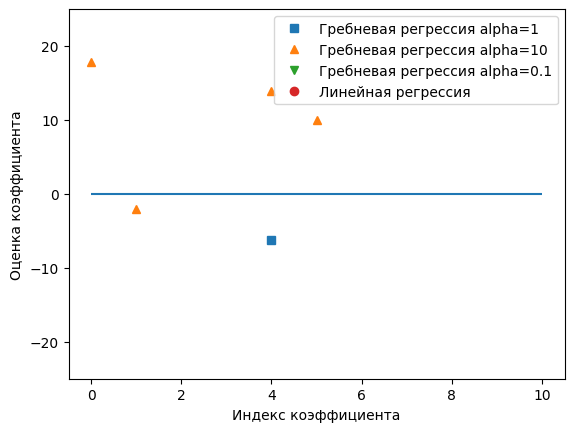

In [132]:
plt.plot(ridge1.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


<h3>Модель Lasso</h3>

In [133]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso_reg_predictions = lasso.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}\n".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}\n".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso_reg_predictions001 = lasso001.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions001)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}\n".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}\n".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на контрольном наборе: 0.38

Количество использованных признаков: 3

Правильность на обучающем наборе: 0.52
Правильность на контрольном наборе: 0.49

Количество использованных признаков: 10


Text(0.5, 0, 'Оценка коэффициента')

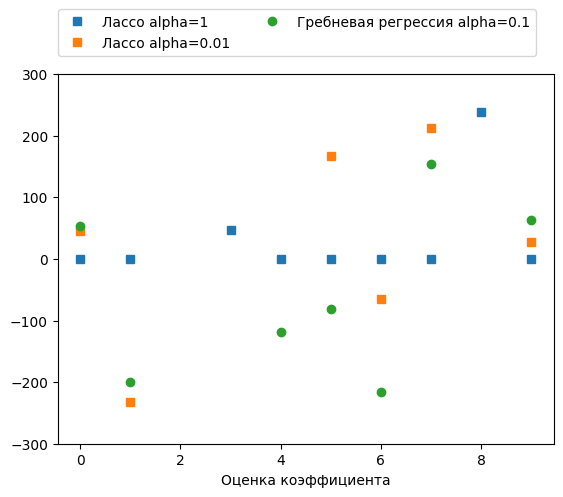

In [137]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, 's', label="Лассо alpha=0.01")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-300,300)
plt.xlabel("Индекс коэффициента")
plt.xlabel("Оценка коэффициента")

In [ ]:
## как предположение почему для Логистической модели вышли плохие результаты, могу выдвинуть что наш датасет предназначен для моделей регресси а не классфикации, с которой должна работать LogisticRegression

In [135]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(logreg.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}\n".format(logreg.score(X_test, y_test)))
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(logreg100.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}\n".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(logreg001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.02
Правильность на контрольном наборе: 0.01

Правильность на обучающем наборе: 0.17
Правильность на контрольном наборе: 0.02

Правильность на обучающем наборе: 0.02
Правильность на контрольном наборе: 0.01


<h1>Датасет load_linnerud</h1>

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

Наилучшие результаты для каждой модели:
KNeighborsRegressor: 590.34
LinearRegression: -765.48
Ridge: 994.32
Lasso: 543.22
LogisticRegression: 0.40


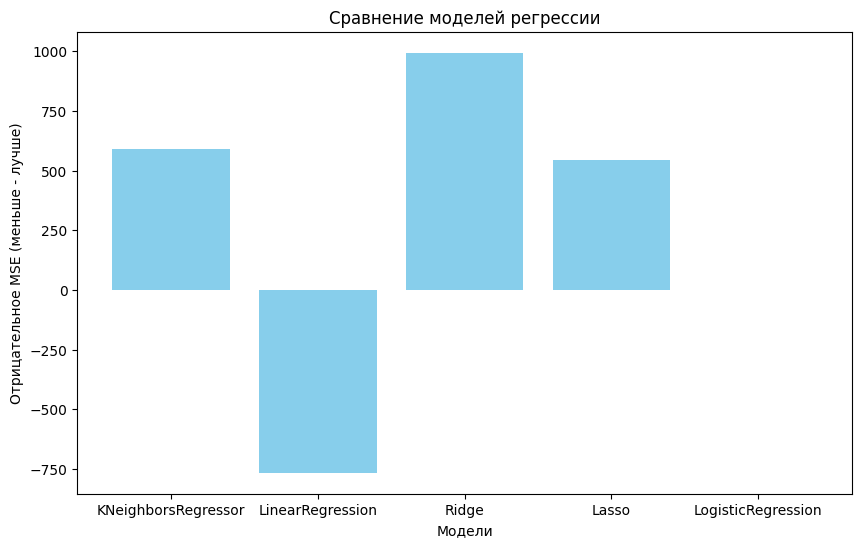

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV

# Загрузка данных и разделение на тренировочную и тестовую выборки
linnerud = load_linnerud()
X, y = linnerud.data, linnerud.target[:, 0]  # Используем "Weight" как целевую переменную
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Создадим словарь для хранения лучших результатов и параметров
best_scores = {}

# Модель KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 21)}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
best_scores['KNeighborsRegressor'] = -grid_search_knn.best_score_

# Модель LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
best_scores['LinearRegression'] = -np.mean((lr.predict(X_test) - y_test) ** 2)

# Модель Ridge
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_scores['Ridge'] = -grid_search_ridge.best_score_

# Модель Lasso
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_scores['Lasso'] = -grid_search_lasso.best_score_

# Модель LogisticRegression (преобразуем задачу регрессии в задачу классификации)
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_train), 1, 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train_class)
best_scores['LogisticRegression'] = logreg.score(X_test, y_test_class)

# Отобразим наилучшие результаты для каждой модели
print("Наилучшие результаты для каждой модели:")
for model, score in best_scores.items():
    print(f"{model}: {score:.2f}")

# Построим график результатов
models = best_scores.keys()
scores = best_scores.values()
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='skyblue')
plt.title('Сравнение моделей регрессии')
plt.xlabel('Модели')
plt.ylabel('Отрицательное MSE (меньше - лучше)')
plt.show()